# Fanal, a neutrino-less beta decay experiment 

## An open exercise

### Signal Estimation from data 

#### USC, Master de Física, Física de Partículas II


J. A. Hernando-Morata

February 2021 - February 2022

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#### Importing modules

In [2]:
import numpy  as np
import tables as tb
import pandas as pd
import matplotlib.pyplot as plt

import scipy.constants as constants
import scipy.stats     as stats
import scipy.optimize  as optimize

import warnings
warnings.filterwarnings('ignore')

In [3]:
# REMEMBER TO ADD your Fanal FOLDER TO PYTHONPATH
import os
import sys
dirpath = os.getcwd()[:-9]
print('add path to PYTHONPATH : ', dirpath)
sys.path.insert(0, os.path.abspath(dirpath))

add path to PYTHONPATH :  /Users/hernando/work/docencia/master/Fisica_Particulas/USC-Fanal


In [4]:
import core.pltext  as pltext   # extensions for plotting histograms
import core.hfit    as hfit     # extension to fit histograms
import core.efit    as efit     # Fit Utilites - Includes Extend Likelihood Fit with composite PDFs
import core.utils   as ut       # generic utilities
import ana.fanal    as fn       # analysis functions specific to fanal
import     collpars as collpars # collaboration specific parameters
pltext.style()

## Indications

### Goal

  * **Estimate the number of signal events in data. Estimate the half-life value**.

### Indications

   * Get the data
   
   * Estimate the number of signal events
   
   * Estimate the best value of the half-life and give a CI.
   
   * Estimate if the experiment has observed or discover $\beta\beta0\nu$
   

## Main Parameters

In [5]:
coll          = collpars.collaboration
ntracks_range = collpars.ntracks_range
eblob2_range  = collpars.eblob2_range
erange        = collpars.erange
eroi          = collpars.eroi

print('Collaboration             : {:s}'.format(coll))
print('number of tracks range    : ({:d}, {:6.2f})'.format(*ntracks_range))
print('Blob-2 energy range       : ({:6.3f}, {:6.3f}) MeV'.format(*eblob2_range))
print('Energy range              : ({:6.3f}, {:6.3f}) MeV'.format(*erange))
print('Energy RoI range          : ({:6.3f}, {:6.3f}) MeV'.format(*eroi))

Collaboration             : new_beta
number of tracks range    : (1,   1.10)
Blob-2 energy range       : ( 0.400,  1.200) MeV
Energy range              : ( 2.400,  2.700) MeV
Energy RoI range          : ( 2.430,  2.480) MeV


In [6]:
# list of the selection variables names and ranges
varnames  = ['num_tracks', 'blob2_E', 'E', 'E']
varranges = [ntracks_range, eblob2_range, erange, eroi]
print('varnames  : ', varnames)
print('varranges : ', varranges)

varnames  :  ['num_tracks', 'blob2_E', 'E', 'E']
varranges :  [(1, 1.1), (0.4, 1.2), (2.4, 2.7), (2.43, 2.48)]


In [7]:
nevts_Bi_RoI  = collpars.nevts_Bi_RoI
nevts_Tl_RoI  = collpars.nevts_Tl_RoI
unevts_Bi_RoI = collpars.unevts_Bi_RoI
unevts_Tl_RoI = collpars.unevts_Tl_RoI

print('Number Bi events in RoI = {:6.3f} +- {:6.3f}'.format(nevts_Bi_RoI, unevts_Bi_RoI))
print('Number Tl events in RoI = {:6.3f} +- {:6.3f}'.format(nevts_Tl_RoI, unevts_Tl_RoI))

Number Bi events in RoI = 21.751 +-  0.963
Number Tl events in RoI =  4.011 +-  0.033


## Access the data

In [8]:
filename = '/data/fanal_'+ coll + '.h5'
print('Data : ', dirpath + filename)

mcbi = pd.read_hdf(dirpath + filename, key = 'mc/bi214')
mctl = pd.read_hdf(dirpath + filename, key = 'mc/tl208')

datab = pd.read_hdf(dirpath + filename, key = 'data/blind')
datar = pd.read_hdf(dirpath + filename, key = 'data/roi')
data  = pd.concat((datab, datar)) # concatenate blind and roi-data into one data DF

Data :  /Users/hernando/work/docencia/master/Fisica_Particulas/USC-Fanal/data/fanal_new_beta.h5


### Plot the selected data in the RoI

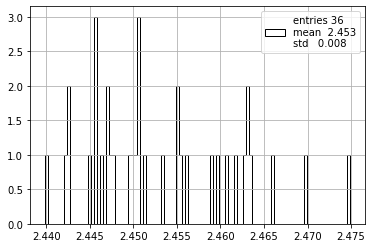

In [15]:
datana = ut.selection_sample(data, varnames, varranges)

pltext.hist(datana.E, 100);